In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [3]:
firstd2015 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2015.csv", low_memory=False)

#Bu low_memory uyarısını almanızın nedeni, her sütun için türleri tahmin etmenin çok bellek gerektirmesidir
#Herbir 

In [4]:
firstd2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
firstd2015.columns # sütunların ne olduğunu göremek için

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
firstd2015.columns = firstd2015.columns.str.replace(' ','_')
# sütun isimlendirmede boşluk olan değerlerin altına tire koyduk.

In [7]:
firstd2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [8]:
firstd2015.shape

(158, 12)

In [9]:
firstd2015.dtypes

Country                           object
Region                            object
Happiness_Rank                     int64
Happiness_Score                  float64
Standard_Error                   float64
Economy_(GDP_per_Capita)         float64
Family                           float64
Health_(Life_Expectancy)         float64
Freedom                          float64
Trust_(Government_Corruption)    float64
Generosity                       float64
Dystopia_Residual                float64
dtype: object

In [10]:
firstd2015.isnull().sum()
#Gördüğümüz üzere hiç null değerimiz yok "sum()" toplam değerini aldık.

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

In [11]:
firstd2015.describe().transpose()
#Bu işlev, verilen dizinin boyutuna izin verir veya ayırır ve değiştirilen diziyi döndürür.

,count,mean,std,min,25%,50%,75%,max
Happiness_Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness_Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard_Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy_(GDP_per_Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health_(Life_Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust_(Government_Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia_Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [12]:
firstd2015=firstd2015.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption",
                      "Happiness_Rank":"Rank"
                      })

# Sütun isimlerini düzenlenmesi gereken verileri daha düzenli hale getirdik.

In [13]:
firstd2015.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

### model_selection tahminleme

In [25]:
mutluluk_degeri = firstd2015["Happiness_Score"].values
kategori =[]
for num in mutluluk_degeri:
    if num >1 and num < 10:
        kategori.append("ilk 10 arası")
    elif num > 10 and num< 100:
        kategori.append("ilk 100 arası")
    elif num > 100 and num < 500:
        kategori.append("6 ile 9 arasi")
    else:
        kategori.append("500'den fazla")
kategori = pd.DataFrame(data =kategori,columns=["Kategori"])
dfirstd2015 = firstd2015.reset_index(drop=True)
data = pd.concat([firstd2015, kategori], axis=1)
data.drop(columns="Happiness_Score",axis= 1,inplace=True)    

In [26]:
a = firstd2015.columns[:20]

In [27]:
a

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
col_isimler = a
tahmin_isimler = ['kategori']
X = firstd2015[col_isimler].values 

y = firstd2015[tahmin_isimler].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

# Hangi ülkeler veya bölgeler genel mutlulukta ve mutlulukta katıkda bulununan altı faktörün her birinde en yüksek sırada yer alıyor ?

- Her bir ülke için bu gruplama yapılmıştır.

In [ ]:
firstd2015.groupby("Country")[["Happiness_Score","Economy","Family","Life_Expectancy",
                       "Freedom","Government_Corruption","Generosity"
                       ]].mean().sort_values("Happiness_Score",ascending=False)

,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


## Mutluluk Sıralamsı

In [ ]:
len(firstd2015["Country"].unique())
# unique yapmamsın temel sebebi ülke tekararı var ise sadece bir tanesini almak

158

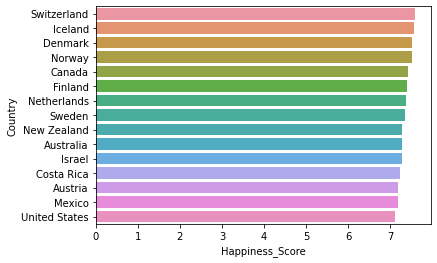

In [ ]:
sns.barplot(y=firstd2015["Country"][:15], x = firstd2015["Happiness_Score"][:15]);
#Mutluluk sıralamasına göre ilk 15'e giren ülkeler

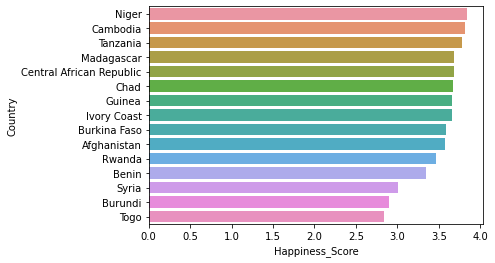

In [ ]:
sns.barplot(y=firstd2015["Country"][-15:], x = firstd2015["Happiness_Score"][-15:]);
#Mutluluk sıralamasına göre son 15'e giren ülkeler

In [ ]:
firstd2015_turkiye = firstd2015[firstd2015["Country"]=="Turkey"]
firstd2015_turkiye

#2015 yılında türkiye ilk 76'ya girmiştir.

,Country,Region,Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


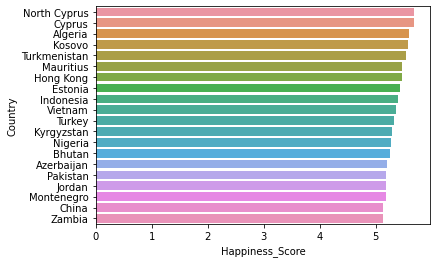

In [ ]:
sns.barplot(y = firstd2015["Country"][65:85], x = firstd2015["Happiness_Score"][65:85]);
# Türkiyenin olduğu sıralamaya bakıyoruz.


# Diğer Yıllar

In [ ]:
secondd2016 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2016.csv", low_memory=False)
thirdd2017 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 
fourthd2018 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 
fifthd2019 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 

In [ ]:
secondd2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
secondd2016.columns = secondd2016.columns.str.replace(' ','_')

In [ ]:
secondd2016=secondd2016.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [ ]:
secondd2016.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
secondd2016.head(15)

,Country,Region,Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [ ]:
thirdd2017.columns = thirdd2017.columns.str.replace('.','_')

In [ ]:
thirdd2017.columns = thirdd2017.columns.str.replace('__','_')

In [ ]:
thirdd2017.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_GDP_per_Capita_', 'Family',
       'Health_Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust_Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
thirdd2017=thirdd2017.rename(columns={"Economy_GDP_per_Capita_":"Economy","Health_Life_Expectancy_":"Life_Expectancy",
                      "Trust_Government_Corruption_":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [ ]:
thirdd2017.columns

Index(['Country', 'Rank', 'Happiness_Score', 'Whisker_high', 'Whisker_low',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
fourthd2018.columns # Asılında kısaca burda ne yapmak istediğimizi çok açık bir şekilde belirtiyoruz.

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
fourthd2018.columns = fourthd2018.columns.str.replace(' ','_')

In [ ]:
fourthd2018.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
fourthd2018.head(15)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [ ]:
fourthd2018.columns=fourthd2018.columns.str.replace('.','_')

In [ ]:
fourthd2018.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
fourthd2018=fourthd2018.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [ ]:
fourthd2018.groupby("Country")[["Happiness_Score","Economy__GDP_per_Capita_","Family","Health__Life_Expectancy_",
                       "Freedom","Trust__Government_Corruption_","Generosity"
                       ]].mean().sort_values("Happiness_Score",ascending=False)

,Happiness_Score,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Trust__Government_Corruption_,Generosity
Country,,,,,,,
Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
...,...,...,...,...,...,...,...
Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664
Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256


In [ ]:
fourthd2018.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
fourthd2018.head(15)

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [ ]:
fifthd2019.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
fifthd2019.columns=fifthd2019.columns.str.replace('.','_')

In [ ]:
fifthd2019.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
fifthd2019 = fifthd2019.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [ ]:
fifthd2019.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [ ]:
fifthd2019.groupby("Country")[["Happiness_Score","Economy__GDP_per_Capita_","Family","Health__Life_Expectancy_",
                       "Freedom","Trust__Government_Corruption_","Generosity"
                       ]].mean().sort_values("Happiness_Score",ascending=False)

,Happiness_Score,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Trust__Government_Corruption_,Generosity
Country,,,,,,,
Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
...,...,...,...,...,...,...,...
Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664
Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256


## 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?

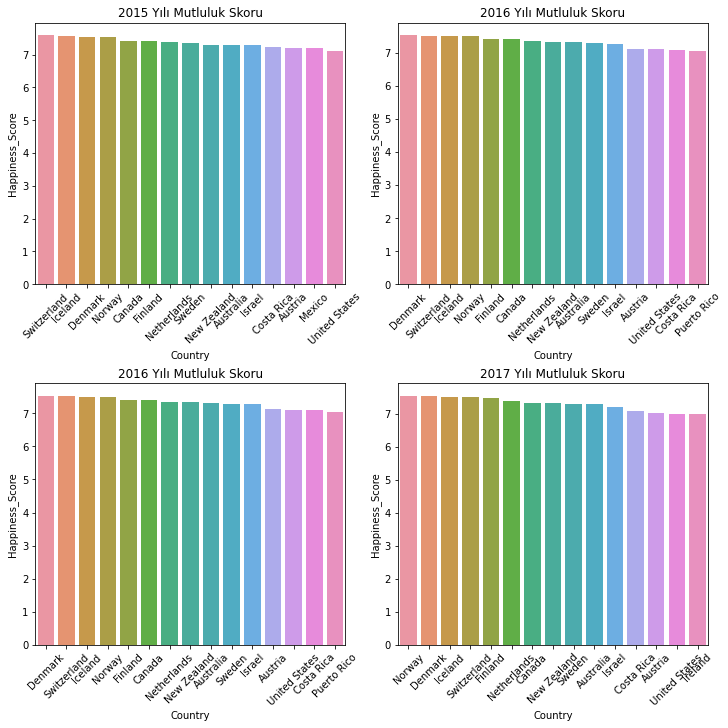

In [ ]:
sort_first = firstd2015.head(15)
sort_secondd = secondd2016.head(15)
sort_secondd2 = secondd2016.head(15)
sort_thirdd = thirdd2017.head(15)


f, axs = plt.subplots(2,2, figsize = (10,10), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_first , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_secondd, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_secondd2, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_thirdd, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)


axs[0, 0].title.set_text('2015 Yılı Mutluluk Skoru')
axs[0, 1].title.set_text('2016 Yılı Mutluluk Skoru')
axs[1, 0].title.set_text('2016 Yılı Mutluluk Skoru')
axs[1, 1].title.set_text('2017 Yılı Mutluluk Skoru')


## Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

In [ ]:
firstd2015["artis_azalis"] = firstd2015["Happiness_Score"].shift(1) - secondd2016["Happiness_Score"]

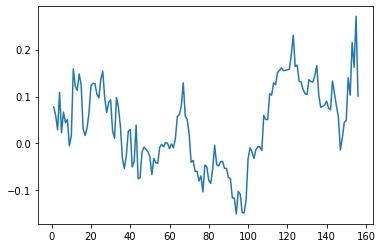

In [ ]:
new_var = firstd2015["artis_azalis"]
new_var.plot();

In [ ]:
firstd2015.loc[100]

Country                           Swaziland
Region                   Sub-Saharan Africa
Rank                                    101
Happiness_Score                       4.867
Standard_Error                      0.08742
Economy                             0.71206
Family                              1.07284
Life_Expectancy                     0.07566
Freedom                             0.30658
Government_Corruption                0.0306
Generosity                          0.18259
Dystopia_Residual                   2.48676
artis_azalis                         -0.033
Name: 100, dtype: object

In [ ]:
firstd2015["Country"].iloc[100]

'Swaziland'